<a href="https://colab.research.google.com/github/DDR7707/End-To-End-ML-Projects/blob/main/Website%20Churn%20HackerEarth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
df_temp = pd.read_csv(io.BytesIO(uploaded1['train.csv']) , low_memory = False , parse_dates = ["joining_date" , "last_visit_time"])

In [ ]:
df = df_temp.copy()

df["year"] = df["joining_date"].dt.year
df["month"] = df["joining_date"].dt.month
df["day"] = df["joining_date"].dt.day
df["last_visit_hour"] = df["last_visit_time"].dt.hour
df["last_visit_minute"] = df["last_visit_time"].dt.minute
df["last_visit_second"] = df["last_visit_time"].dt.second

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   36992 non-null  object        
 1   Name                          36992 non-null  object        
 2   age                           36992 non-null  int64         
 3   gender                        36992 non-null  object        
 4   security_no                   36992 non-null  object        
 5   region_category               31564 non-null  object        
 6   membership_category           36992 non-null  object        
 7   joining_date                  36992 non-null  datetime64[ns]
 8   joined_through_referral       36992 non-null  object        
 9   referral_id                   36992 non-null  object        
 10  preferred_offer_types         36704 non-null  object        
 11  medium_of_operation         

In [ ]:
df.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
year                               0
month                              0
d

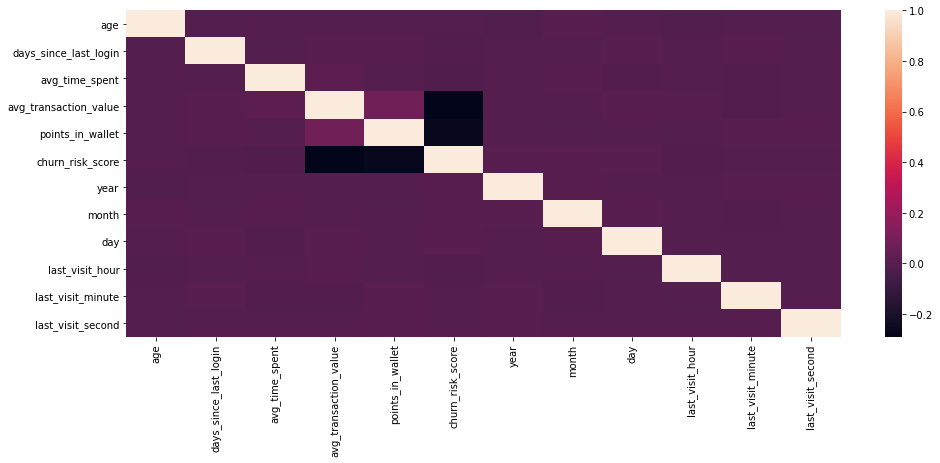

In [ ]:
import seaborn as sns
plt.figure(figsize = (16,6))
sns.heatmap(df.corr())

In [ ]:
df.drop(["joining_date" , "last_visit_time" , "security_no" , "customer_id" , "Name"] , axis = 1 , inplace = True)

In [ ]:
df.head().T

,0,1,2,3,4
age,18,32,44,37,31
gender,F,F,F,M,F
region_category,Village,City,Town,City,City
membership_category,Platinum Membership,Premium Membership,No Membership,No Membership,No Membership
joined_through_referral,No,?,Yes,Yes,No
referral_id,xxxxxxxx,CID21329,CID12313,CID3793,xxxxxxxx
preferred_offer_types,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Gift Vouchers/Coupons,Credit/Debit Card Offers
medium_of_operation,?,Desktop,Desktop,Desktop,Smartphone
internet_option,Wi-Fi,Mobile_Data,Wi-Fi,Mobile_Data,Mobile_Data
days_since_last_login,17,16,14,11,20


In [ ]:
median = df["points_in_wallet"].median()
df["points_in_wallet"].fillna(median , inplace = True)

In [ ]:
df["preferred_offer_types"].mode()[0]

'Gift Vouchers/Coupons'

In [ ]:
df["preferred_offer_types"].value_counts()

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [ ]:
df["preferred_offer_types"].fillna(df["preferred_offer_types"].mode()[0] , inplace = True)

In [ ]:
df["preferred_offer_types"].isna().sum()

0

In [ ]:
df["region_category"].value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

In [ ]:
df["region_category"].fillna("unknown" , inplace = True)
df.isna().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
year                            0
month                           0
day                             0
last_visit_hour                 0
last_visit_minute               0
last_visit_second               0
dtype: int64

In [ ]:
df.drop(["referral_id" , "avg_frequency_login_days"] , axis = 1 , inplace = True)

In [ ]:
df = pd.get_dummies(df , columns = ["gender" , "region_category" , "membership_category" , "joined_through_referral" , "preferred_offer_types" , "medium_of_operation" , "internet_option" , "used_special_discount" , "offer_application_preference" , "past_complaint" , "complaint_status" , "feedback", "year" , "month" , "day"] , prefix=["gender" , "region_category" , "membership_category" , "joined_through_referral" , "preferred_offer_types" , "medium_of_operation" , "internet_option" , "used_special_discount" , "offer_application_preference" , "past_complaint" , "complaint_status" , "feedback" , "year" , "month" , "day"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Columns: 101 entries, age to day_31
dtypes: float64(3), int64(6), uint8(92)
memory usage: 5.8 MB


In [ ]:
x = df.drop(["churn_risk_score"] , axis = 1)
y = df["churn_risk_score"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x[["days_since_last_login" , "avg_transaction_value" , "points_in_wallet" , "avg_time_spent" , "age"]] = scaler.fit_transform(x[["days_since_last_login" , "avg_transaction_value" , "points_in_wallet" , "avg_time_spent" , "age"]])

In [ ]:
x.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,last_visit_hour,last_visit_minute,last_visit_second,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,region_category_unknown,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_?,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_?,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0.148148,0.991220,0.514859,0.526717,0.545073,16,8,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.407407,0.990244,0.515803,0.121456,0.515343,12,38,13,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.629630,0.988293,0.550486,0.204074,0.445750,22,53,21,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.500000,0.985366,0.473971,0.246577,0.469416,15,57,50,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.388889,0.994146,0.483866,0.238950,0.503130,15,46,44,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# from sklearn.preprocessing import StandardScaler
# standard = StandardScaler()
# x[["year" , "month" , "day"]] = standard.fit_transform(x[["year" , "month" , "day"]])

In [ ]:
x.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,last_visit_hour,last_visit_minute,last_visit_second,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,region_category_unknown,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_?,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_?,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0.148148,0.991220,0.514859,0.526717,0.545073,16,8,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.407407,0.990244,0.515803,0.121456,0.515343,12,38,13,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.629630,0.988293,0.550486,0.204074,0.445750,22,53,21,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.500000,0.985366,0.473971,0.246577,0.469416,15,57,50,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.388889,0.994146,0.483866,0.238950,0.503130,15,46,44,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state = 42)
random.fit(xtrain , ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
preds = random.predict(xtest)
preds

array([1, 4, 4, ..., 3, 3, 4])

In [ ]:
random.score(xtest,ytest)

0.749966211650223

In [ ]:
x = x[x.columns].values
x

array([[0.14814815, 0.99121951, 0.51485949, ..., 0.        , 0.        ,
        0.        ],
       [0.40740741, 0.9902439 , 0.51580334, ..., 0.        , 0.        ,
        0.        ],
       [0.62962963, 0.98829268, 0.55048613, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.24074074, 0.98634146, 0.49077726, ..., 0.        , 0.        ,
        0.        ],
       [0.7962963 , 0.98926829, 0.54494039, ..., 0.        , 0.        ,
        0.        ],
       [0.46296296, 0.98926829, 0.4782543 , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y_cat = to_categorical(y)
y_cat

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
x.shape , y.shape

((36992, 100), (36992,))

In [ ]:
model = Sequential()
model.add(Dense(57 , activation='relu'))
# model.add(Dense(20 , activation="relu"))
# model.add(Dropout(0.3))
# model.add(Dense(10 , activation="relu"))
model.add(Dense(6 , activation="softmax"))
model.compile(Adam(lr=0.01), 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
h = model.fit(x, y_cat, validation_split=0.1 , verbose=1, batch_size = 1000, epochs=20)

Epoch 1/20
34/34 [==============================] - 1s 7ms/step - loss: 2.2343 - accuracy: 0.3096 - val_loss: 1.1412 - val_accuracy: 0.5462
Epoch 2/20
34/34 [==============================] - 0s 4ms/step - loss: 1.0197 - accuracy: 0.5664 - val_loss: 0.7267 - val_accuracy: 0.6324
Epoch 3/20
34/34 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.6543 - val_loss: 0.6814 - val_accuracy: 0.6095
Epoch 4/20
34/34 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.6370 - val_loss: 0.6553 - val_accuracy: 0.6465
Epoch 5/20
34/34 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.6534 - val_loss: 0.6839 - val_accuracy: 0.6219
Epoch 6/20
34/34 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.6378 - val_loss: 0.6515 - val_accuracy: 0.6427
Epoch 7/20
34/34 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.6645 - val_loss: 0.6610 - val_accuracy: 0.6451
Epoch 8/20
34/34 [==

Text(0, 0.5, 'epochs')

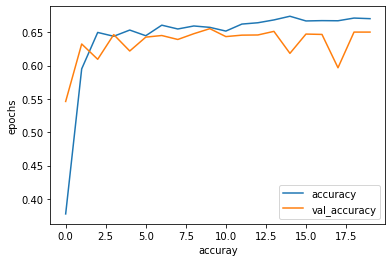

In [ ]:
plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.xlabel("accuray")
plt.legend(["accuracy" , "val_accuracy"])
plt.ylabel("epochs")

Text(0, 0.5, 'epochs')

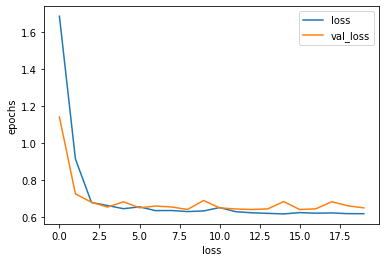

In [ ]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])
plt.xlabel("loss")
plt.legend(["loss" , "val_loss"])
plt.ylabel("epochs")

In [ ]:
uploaded2 = files.upload()

Saving test.csv to test (1).csv


In [ ]:
test_temp = pd.read_csv(io.BytesIO(uploaded2['test.csv']) , low_memory = False , parse_dates = ["joining_date" , "last_visit_time"])

In [ ]:
test = test_temp.copy()

test["year"] = test["joining_date"].dt.year
test["month"] = test["joining_date"].dt.month
test["day"] = test["joining_date"].dt.day
test["last_visit_hour"] = test["last_visit_time"].dt.hour
test["last_visit_minute"] = test["last_visit_time"].dt.minute
test["last_visit_second"] = test["last_visit_time"].dt.second

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   19919 non-null  object        
 1   Name                          19919 non-null  object        
 2   age                           19919 non-null  int64         
 3   gender                        19919 non-null  object        
 4   security_no                   19919 non-null  object        
 5   region_category               16971 non-null  object        
 6   membership_category           19919 non-null  object        
 7   joining_date                  19919 non-null  datetime64[ns]
 8   joined_through_referral       19919 non-null  object        
 9   referral_id                   19919 non-null  object        
 10  preferred_offer_types         19760 non-null  object        
 11  medium_of_operation         

In [ ]:
test.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 2948
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            159
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                1963
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
year                               0
month                              0
day                                0
l

In [ ]:
customers = test["customer_id"]
test.drop(["joining_date" , "last_visit_time" , "security_no" , "customer_id" , "Name"] , axis = 1 , inplace = True)
test.drop(["referral_id" , "avg_frequency_login_days"] , axis = 1 , inplace = True)

In [ ]:
test["region_category"].fillna("unknown" , inplace = True)
test["points_in_wallet"].fillna(median , inplace = True)

In [ ]:
test["preferred_offer_types"].fillna("Gift Vouchers/Coupons" , inplace = True)

In [ ]:
test.isna().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
year                            0
month                           0
day                             0
last_visit_hour                 0
last_visit_minute               0
last_visit_second               0
dtype: int64

In [ ]:
test = pd.get_dummies(test , columns = ["gender" , "region_category" , "membership_category" , "joined_through_referral" , "preferred_offer_types" , "medium_of_operation" , "internet_option" , "used_special_discount" , "offer_application_preference" , "past_complaint" , "complaint_status" , "feedback"] , prefix=["gender" , "region_category" , "membership_category" , "joined_through_referral" , "preferred_offer_types" , "medium_of_operation" , "internet_option" , "used_special_discount" , "offer_application_preference" , "past_complaint" , "complaint_status" , "feedback"])

In [ ]:
test[["days_since_last_login" , "avg_transaction_value" , "points_in_wallet" , "avg_time_spent" , "age"]] = scaler.transform(test[["days_since_last_login" , "avg_transaction_value" , "points_in_wallet" , "avg_time_spent" , "age"]])

In [ ]:
test[["year" , "month" , "day"]] = standard.transform(test[["year" , "month" , "day"]])

In [ ]:
test = test[test.columns].values
test

array([[0.74074074, 0.98634146, 0.52901394, ..., 0.        , 0.        ,
        0.        ],
       [0.57407407, 0.98536585, 0.47141428, ..., 0.        , 0.        ,
        0.        ],
       [0.38888889, 0.99219512, 0.50076455, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.83333333, 0.99219512, 0.47652528, ..., 0.        , 0.        ,
        0.        ],
       [0.12962963, 0.97756098, 0.48492572, ..., 0.        , 0.        ,
        0.        ],
       [0.18518519, 0.98243902, 0.54868438, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
preds = model.predict_classes(test)
preds

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 3, 3, ..., 5, 3, 3])

In [ ]:
data = {"customer_id" : customers , 
        "churn_risk_score" : preds}

In [ ]:
final = pd.DataFrame(data , columns=["customer_id" , "churn_risk_score"])
final.head()

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,3
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,5


In [ ]:
final.to_csv('ANN Churn 1.csv')
files.download('ANN Churn 1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>